In [33]:
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow as tf

In [34]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [35]:
train_data_set = pd.read_csv("/home/mdirfan-code/projects/Sentimeter-v1.0/BERT_Model/Datasets/Training_dataset.csv")
train_data_set

,Unnamed: 0,sentiment,tweet_text
0,49647,Irrelevant,Last Weekend league for Fifa 20 Glad I could f...
1,43676,Positive,omg i'm so excited to watch dk play pubg
2,55915,Negative,all others who have problems with
3,14927,Positive,in
4,44039,Irrelevant,minho felix de jeongin sucked at pubg pretty h...
...,...,...,...
59191,37541,Negative,you
59192,6332,Neutral,I'm not even going to show a 7 2 loss.
59193,55392,Negative,Fuck this call of duty update..
59194,864,Positive,I should get up feed my dogs such that way whe...


In [36]:
test_data_set = pd.read_csv("/home/mdirfan-code/projects/Sentimeter-v1.0/BERT_Model/Datasets/Testing_dataset.csv")
test_data_set

,Unnamed: 0,sentiment,tweet_text
0,61413,Irrelevant,Looks to me like he failed to check out the wa...
1,44887,Irrelevant,Wow it takes all sorts of crazy people out the...
2,73662,Neutral,Nvidia Unveils The World s Fastest Gaming Moni...
3,36694,Neutral,Huge radio play here. Reinvention Corporate Ev...
4,2308,Negative,SO I HAPPY WHO ABOUT THIS.
...,...,...,...
14795,12630,Negative,where is all my Mamba Edition extras? I m bee...
14796,49615,Negative,Sell 700k fifa coins fucking this game
14797,12322,Negative,107 for a four game break and I can't even ev...
14798,4355,Irrelevant,has called me a madman.. I understood right fr...


In [37]:
test_data_set.drop('Unnamed: 0',axis=1,inplace=True)
test_data_set

,sentiment,tweet_text
0,Irrelevant,Looks to me like he failed to check out the wa...
1,Irrelevant,Wow it takes all sorts of crazy people out the...
2,Neutral,Nvidia Unveils The World s Fastest Gaming Moni...
3,Neutral,Huge radio play here. Reinvention Corporate Ev...
4,Negative,SO I HAPPY WHO ABOUT THIS.
...,...,...
14795,Negative,where is all my Mamba Edition extras? I m bee...
14796,Negative,Sell 700k fifa coins fucking this game
14797,Negative,107 for a four game break and I can't even ev...
14798,Irrelevant,has called me a madman.. I understood right fr...


In [38]:
train_data_set.drop(['Unnamed: 0'],axis=1,inplace=True)
train_data_set


,sentiment,tweet_text
0,Irrelevant,Last Weekend league for Fifa 20 Glad I could f...
1,Positive,omg i'm so excited to watch dk play pubg
2,Negative,all others who have problems with
3,Positive,in
4,Irrelevant,minho felix de jeongin sucked at pubg pretty h...
...,...,...
59191,Negative,you
59192,Neutral,I'm not even going to show a 7 2 loss.
59193,Negative,Fuck this call of duty update..
59194,Positive,I should get up feed my dogs such that way whe...


In [39]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data_set['tweet_text'].values,train_data_set['sentiment'].values))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_set['tweet_text'].values,test_data_set['sentiment'].values))

In [40]:
train_data_set['sentiment'].value_counts()

Negative      17978
Positive      16536
Neutral       14503
Irrelevant    10179
Name: sentiment, dtype: int64

In [41]:
table = tf.lookup.StaticHashTable(
    initializer = tf.lookup.KeyValueTensorInitializer(
        keys = tf.constant([ 'Negative','Positive', 'Neutral', 'Irrelevant']),
        values=tf.constant([0,1,2,3])
    ),
    default_value=tf.constant(-1),
    name = "target_encoding"
)

@tf.function
def target(x):
    return table.lookup(x)
    

In [42]:
def show_batch(dataset, size=5):
    for batch, label in dataset.take(size):
        print(batch.numpy())
        print(target(label).numpy())

In [43]:
show_batch(train_dataset,6)

b'Last Weekend league for Fifa 20 Glad I could finish strong . . Birthday Mbappe and TOTS de Bruyne were absolutely clutch . pic.twitter.com n1766sVgP9'
3
b"omg i'm so excited to watch dk play pubg"
1
b'all others who have problems with'
0
b'in'
1
b"minho felix de jeongin sucked at pubg pretty hard today I'm just.. I'm less different than them at 1 thing"
3
b"I appreciate any advice suggestions on this pleeeeease if it's doing hot noodle canister in! All game action was smooth before. This choppy capture is not good. It was fine capturing in OBS before the Nvidia driver update for my RTX GPUs already NERDIOD help NEEDED! "
0


In [44]:
def fetch(text, labels):
    return text, tf.one_hot(target(labels),4)

In [45]:
train_data_f = train_dataset.map(fetch)
test_data_f = test_dataset.map(fetch)

In [46]:
next(iter(train_data_f))

(<tf.Tensor: shape=(), dtype=string, numpy=b'Last Weekend league for Fifa 20 Glad I could finish strong . . Birthday Mbappe and TOTS de Bruyne were absolutely clutch . pic.twitter.com n1766sVgP9'>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 0., 0., 1.], dtype=float32)>)

In [47]:
train_data, train_labels = next(iter(train_data_f.batch(5)))
train_data, train_labels

(<tf.Tensor: shape=(5,), dtype=string, numpy=
 array([b'Last Weekend league for Fifa 20 Glad I could finish strong . . Birthday Mbappe and TOTS de Bruyne were absolutely clutch . pic.twitter.com n1766sVgP9',
        b"omg i'm so excited to watch dk play pubg",
        b'all others who have problems with', b'in',
        b"minho felix de jeongin sucked at pubg pretty hard today I'm just.. I'm less different than them at 1 thing"],
       dtype=object)>,
 <tf.Tensor: shape=(5, 4), dtype=float32, numpy=
 array([[0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.]], dtype=float32)>)

In [48]:
# embedding = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"
# hub_layer = hub.KerasLayer(embedding, output_shape=[128], input_shape=[],
#                             dtype = tf.string, trainable= True
#     )
# hub_layer(train_data[:1])

In [49]:
from sklearn.utils import class_weight

class_weights = list(class_weight.compute_class_weight('balanced', classes = np.unique(train_data_set['sentiment']) ,y=train_data_set['sentiment']))

In [50]:
class_weights
# np.unique(train_data_set['sentiment'])

[1.4538756262894195,
 0.8231727667148737,
 1.0204095704337033,
 0.8949564586357039]

In [51]:
class_weights.sort()
np.unique(train_data_set['sentiment'])

array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)

In [52]:
weights = {}
for index, weight in enumerate(class_weights):
    weights[index] = weight
weights


{0: 0.8231727667148737,
 1: 0.8949564586357039,
 2: 1.0204095704337033,
 3: 1.4538756262894195}

In [53]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_data_f = train_data_f.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data_f = test_data_f.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [54]:
for example, label in train_data_f.take(1):
    print('texts: ', example.numpy())
    print()
    print('labels: ', label.numpy())

texts:  [b'zysola.blogspot.com p welcome.html...' b'do'
 b'the Battlefield 3 is still the best game. pic.twitter.com LVLyYbhYSY'
 b'Hearthstone made a Vore card oh no pic.twitter.com GCuyalO7hm'
 b'Thank you to everyone who joined me on my kerfuffle of a stream tonight. Monster hunter then battlefield then back to monster hunter. Jeez my teammates need to make up their minds lmao '
 b"Hello from . There's a French couple out with.. what.uol.com.br noticias histo..."
 b'Im sad on mobile u must update fortnite 2 times pic.twitter.com sQzRpUCyBs'
 b'FORTNITE . '
 b'I certainly love even playing Call of Duty with my fans! If anyone wants to please play PM me!'
 b' the vote to kick is the most stupid thing you ve ever added to the game it s more annoying than Clash. Been trying to get into a game for an hour but I keep getting kicked because Plat s are toxic'
 b' The wondrous views made of Draenor...' b'this' b'you'
 b' NBA2K Your game is mud'
 b'Stream Borderlands with sarcastic comments d

In [55]:
VOCAB_SIZE = 10000
encoder = tf.keras.layers.TextVectorization(max_tokens = VOCAB_SIZE)
encoder.adapt(train_data_f.map(lambda text, label:text))

In [56]:
vocab = np.array(encoder.get_vocabulary())
vocab[:12]

array(['', '[UNK]', 'the', 'i', 'to', 'and', 'a', 'of', 'is', 'for', 'in',
       'this'], dtype='<U27')

In [57]:
example = ["this is my game", "I love Myself more than anything","why me nivea"]
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[ 11,   8,  15,  18,   0,   0],
       [  3,  58, 491,  63, 132, 370],
       [ 71,  20,   1,   0,   0,   0]])

In [58]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=10000,
        output_dim=128,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.Dense(4,activation='softmax')
])



In [59]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [60]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(train_data_f.take(1))
print(predictions[0])
# train_data_f.take(1)

[0.2504467  0.24771394 0.2534263  0.24841307]


In [61]:
padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

[0.2474754  0.24898201 0.25216958 0.25137296]


In [62]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         1280000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 1,559,876
Trainable params: 1,559,876
No

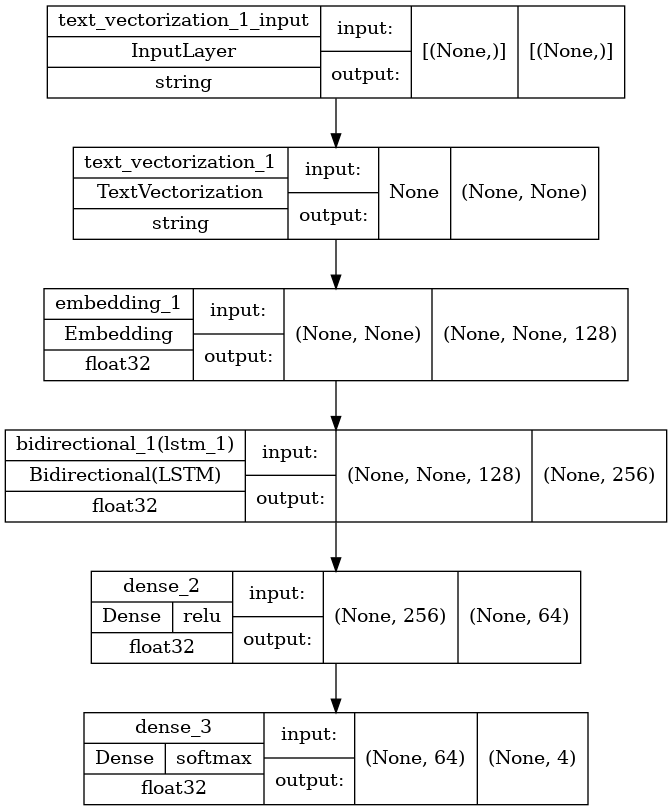

In [64]:
model_img_file = 'Bidirection_LSTM.png'
tf.keras.utils.plot_model(model, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

In [65]:
history = model.fit(train_data_f,epochs=25,validation_data=test_data_f,verbose=1,class_weight=weights)

# model.summary()

Epoch 1/25
925/925 [==============================] - 132s 135ms/step - loss: 1.2167 - accuracy: 0.5027 - val_loss: 1.0411 - val_accuracy: 0.6197
Epoch 2/25
925/925 [==============================] - 149s 160ms/step - loss: 0.8714 - accuracy: 0.7169 - val_loss: 0.8347 - val_accuracy: 0.7183
Epoch 3/25
925/925 [==============================] - 141s 151ms/step - loss: 0.6826 - accuracy: 0.7921 - val_loss: 0.7390 - val_accuracy: 0.7565
Epoch 4/25
925/925 [==============================] - 140s 149ms/step - loss: 0.5759 - accuracy: 0.8294 - val_loss: 0.6728 - val_accuracy: 0.7777
Epoch 5/25
925/925 [==============================] - 123s 130ms/step - loss: 0.5007 - accuracy: 0.8555 - val_loss: 0.6338 - val_accuracy: 0.7910
Epoch 6/25
925/925 [==============================] - 124s 133ms/step - loss: 0.4422 - accuracy: 0.8740 - val_loss: 0.5972 - val_accuracy: 0.8045
Epoch 7/25
925/925 [==============================] - 139s 148ms/step - loss: 0.3925 - accuracy: 0.8895 - val_loss: 0.5683 -

In [66]:
classes = [ 'Negative','Positive', 'Neutral', 'Irrelevant']

In [67]:
classes[model.predict(np.array(["I think the t 800s were ok disapointed that they do not explode when dying. I mean we are shooting a powercell that explodes the size of 30 to 60 pounds of C4."])).argmax()]

'Neutral'

In [68]:

classes[model.predict(np.array(["The best game I've played in the last few years is Red Dead Redeemption 2. One of the best games I've ever played."])).argmax()]

'Positive'

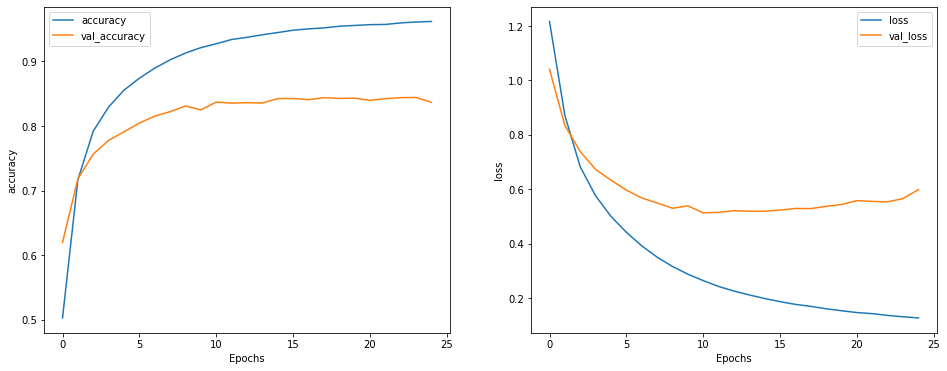

In [69]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')